In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H-2024-Task5-Training.tsv', sep='\t')
df_dev = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H-2024-Task5-Validation.tsv', sep='\t')

In [3]:
!pip install transformers seqeval torch tqdm accelerate sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=ab602050325145de1138bd13db93e89ea9f4b7e392d5483514a01fa721b53716
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [4]:
df_train

,tweet_id,text,label
0,1364778927105933315,"Psych Med Twitter, wondering if you can help. ...",0
1,1130719434526511104,@dmx_biographer @HellaChillAF I wouldn’t fuck ...,0
2,1184221813733253120,Harley is autistic.... she has the mental capa...,1
3,1435958387020341248,I just made my son cry before going to school ...,1
4,1112559025927999488,Yooooooo my dad really just said “I’d rather h...,0
...,...,...,...
7393,1232778727186223108,Just got all kinds of dirty looks for ordering...,1
7394,1174782065532780544,"anyways- if they did cause autism, i’d rather ...",0
7395,1052612940438728704,2/4 trouble at work and I could have lost my j...,0
7396,1243556662964862976,@LawyerChamber $LgiLder22 I have severe asthma...,1


In [5]:
df_dev

,tweet_id,text,label
0,1265323726570225669,Mom Finds Secret to Homeschooling her Autistic...,0
1,1254180961622900738,I hope our child has my calmness and NOT Andre...,0
2,800336385399885824,Blind Girl With Autism Mimics Whitney Houston ...,0
3,1107948318150152192,"@amyschumer watching #growing, my 2yo son has ...",1
4,1438320313511473154,@robbystarbuck @AmericanAir would rather a mot...,0
...,...,...,...
384,1479160193808273413,my 7yo is being tested for adhd and struggles ...,0
385,1084086161667252225,@attachedmrsL the first reply on the tweet tho...,0
386,1404612356819374080,There's a mom who recorded her autistic son &a...,0
387,1458807608052174856,@itsadollthxng Lmfao girl !!! I’m upset fr cau...,1


In [6]:
for df in [df_train, df_dev]:
    df['text'] = df['text'].str.replace(r'http\S+|www.\S+', '', case=False)
    df['text'] = df['text'].str.replace(r'@\S+|#\S+', '')
    df['text'] = df['text'].str.replace(r'\s+', ' ', case=False)

<ipython-input-6-7c82a75b64f0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'http\S+|www.\S+', '', case=False)
<ipython-input-6-7c82a75b64f0>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'@\S+|#\S+', '')
<ipython-input-6-7c82a75b64f0>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'\s+', ' ', case=False)


In [7]:
df_train

,tweet_id,text,label
0,1364778927105933315,"Psych Med Twitter, wondering if you can help. ...",0
1,1130719434526511104,I wouldn’t fuck rob with YOUR dick. He’s an a...,0
2,1184221813733253120,Harley is autistic.... she has the mental capa...,1
3,1435958387020341248,I just made my son cry before going to school ...,1
4,1112559025927999488,Yooooooo my dad really just said “I’d rather h...,0
...,...,...,...
7393,1232778727186223108,Just got all kinds of dirty looks for ordering...,1
7394,1174782065532780544,"anyways- if they did cause autism, i’d rather ...",0
7395,1052612940438728704,2/4 trouble at work and I could have lost my j...,0
7396,1243556662964862976,$LgiLder22 I have severe asthma and my oldest...,1


In [8]:
df_dev

,tweet_id,text,label
0,1265323726570225669,Mom Finds Secret to Homeschooling her Autistic...,0
1,1254180961622900738,I hope our child has my calmness and NOT Andre...,0
2,800336385399885824,Blind Girl With Autism Mimics Whitney Houston ...,0
3,1107948318150152192,"watching my 2yo son has ASD, you just made me...",1
4,1438320313511473154,would rather a mother suffocate an asthmatic ...,0
...,...,...,...
384,1479160193808273413,my 7yo is being tested for adhd and struggles ...,0
385,1084086161667252225,"the first reply on the tweet though 🤣 yes, I ...",0
386,1404612356819374080,There's a mom who recorded her autistic son &a...,0
387,1458807608052174856,Lmfao girl !!! I’m upset fr cause jacelyn has...,1


In [9]:
from datasets import load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, IntervalStrategy
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from accelerate import Accelerator
import numpy as np
import torch
import os
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)
texts = df_train['text'].tolist()
labels = df_train['label'].tolist()
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large')
train_dataset = TextDataset(tokenizer, texts, labels)
training_args = TrainingArguments(
    seed = 185304009,
    output_dir='./results_temp',  # Temporarily save here
    num_train_epochs=20,  # Adjusted for demonstration
    learning_rate=2e-5,
    per_device_train_batch_size=20,
    per_device_eval_batch_size=20,
    warmup_steps=0,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy=IntervalStrategy.NO,
    save_strategy=IntervalStrategy.EPOCH,
    load_best_model_at_end=False,  # Ensure models are saved regardless of performance
)
class CustomTrainer(Trainer):
    def on_train_end(self, args, state, control, **kwargs):
        super().on_train_end(args, state, control, **kwargs)
        for epoch in range(1, int(training_args.num_train_epochs) + 1):
            epoch_dir = f"./roberta_model_{epoch}"
            os.rename(f"{training_args.output_dir}/checkpoint-{epoch}", epoch_dir)
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.505500
200,0.344900
300,0.297300
400,0.222800
500,0.214000
600,0.186600
700,0.201200
800,0.168300
900,0.161500
1000,0.130300


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file

TrainOutput(global_step=7400, training_loss=0.05505176277009997, metrics={'train_runtime': 5748.5517, 'train_samples_per_second': 25.739, 'train_steps_per_second': 1.287, 'total_flos': 5.621749309926789e+16, 'train_loss': 0.05505176277009997, 'epoch': 20.0})

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

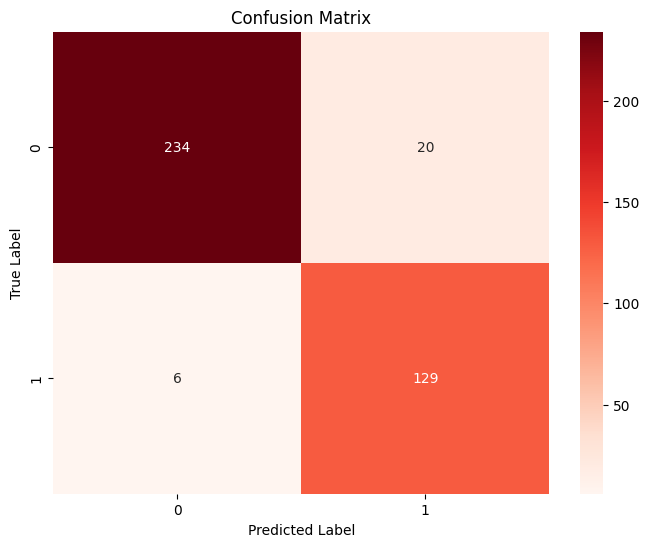

Accuracy: 0.9331619537275064
F1 Score (Class 1): 0.9084507042253522
Recall (Macro): 0.9384076990376203
Precision (Macro): 0.9203859060402684


In [10]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-370')
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_1 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])
df_merged_1 = pd.concat([df_dev, df_predictions_1], axis=1)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_1['label']
predicted_labels = df_merged_1['predicted_label']
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_1.to_csv('bartL_task5_predictions_001_epoch_1.csv', index=False)

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

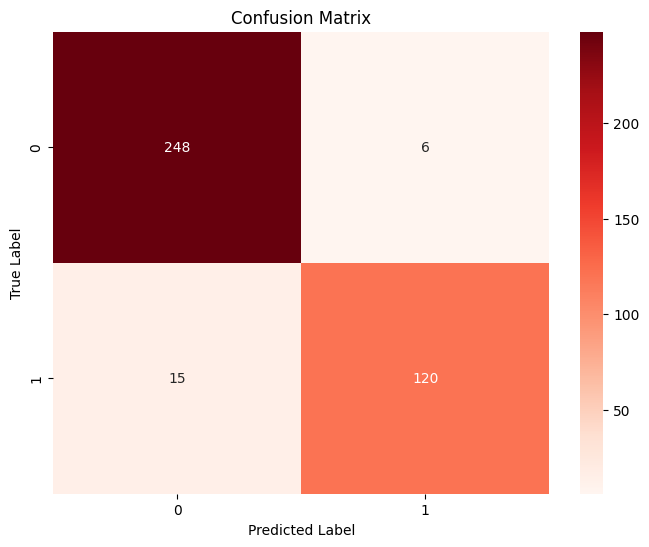

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.9195402298850575
Recall (Macro): 0.9326334208223972
Precision (Macro): 0.9476733659243164


In [11]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-740')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_2 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_2 = pd.concat([df_dev, df_predictions_2], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_2['label']                                                                                               # HERE
predicted_labels = df_merged_2['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_2.to_csv('bartL_task5_predictions_001_epoch_2.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

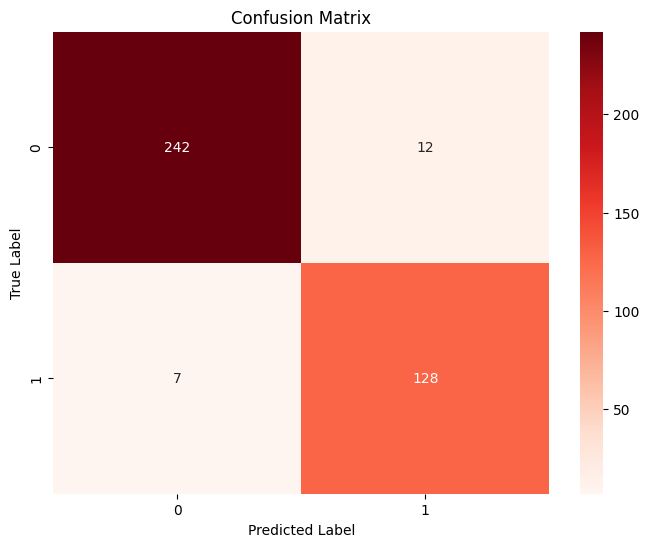

Accuracy: 0.9511568123393316
F1 Score (Class 1): 0.930909090909091
Recall (Macro): 0.9504520268299796
Precision (Macro): 0.9430866322432587


In [12]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-1110')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_3 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_3 = pd.concat([df_dev, df_predictions_3], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_3['label']                                                                                               # HERE
predicted_labels = df_merged_3['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_3.to_csv('bartL_task5_predictions_001_epoch_3.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

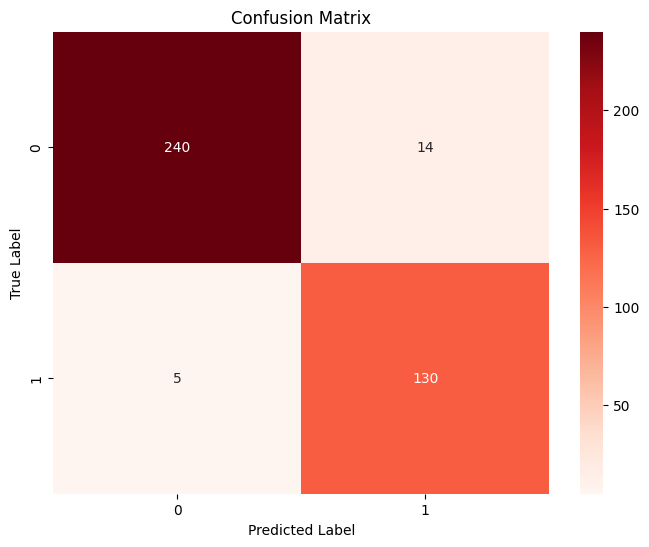

Accuracy: 0.9511568123393316
F1 Score (Class 1): 0.931899641577061
Recall (Macro): 0.9539224263633712
Precision (Macro): 0.9411848072562359


In [13]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-1480')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_4 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_4 = pd.concat([df_dev, df_predictions_4], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_4['label']                                                                                               # HERE
predicted_labels = df_merged_4['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_4.to_csv('bartL_task5_predictions_001_epoch_4.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

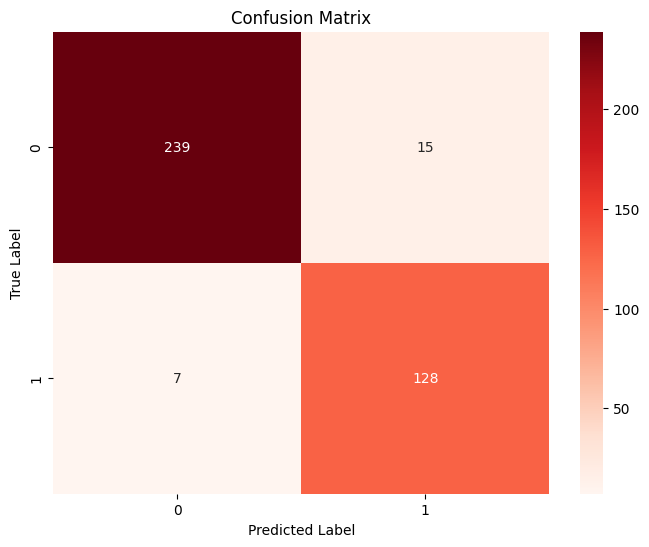

Accuracy: 0.9434447300771208
F1 Score (Class 1): 0.920863309352518
Recall (Macro): 0.944546515018956
Precision (Macro): 0.9333248052760248


In [14]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-1850')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_5 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_5 = pd.concat([df_dev, df_predictions_5], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_5['label']                                                                                               # HERE
predicted_labels = df_merged_5['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_5.to_csv('bartL_task5_predictions_001_epoch_5.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

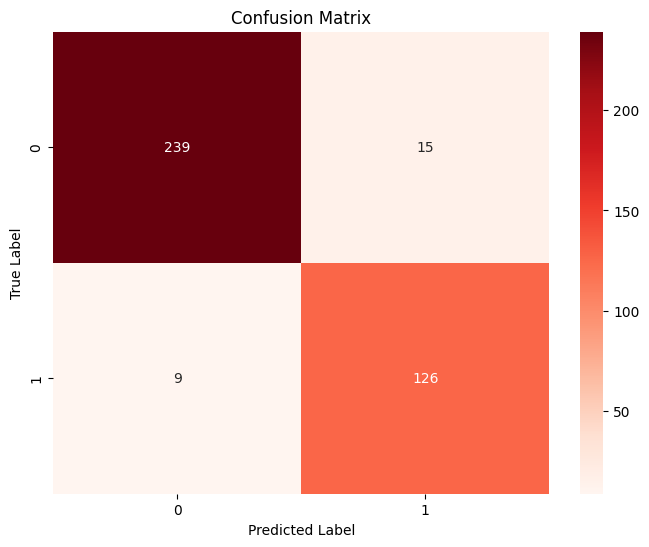

Accuracy: 0.9383033419023136
F1 Score (Class 1): 0.9130434782608695
Recall (Macro): 0.9371391076115485
Precision (Macro): 0.9286633493479752


In [15]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-2220')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_6 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_6 = pd.concat([df_dev, df_predictions_6], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_6['label']                                                                                               # HERE
predicted_labels = df_merged_6['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_6.to_csv('bartL_task5_predictions_001_epoch_6.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

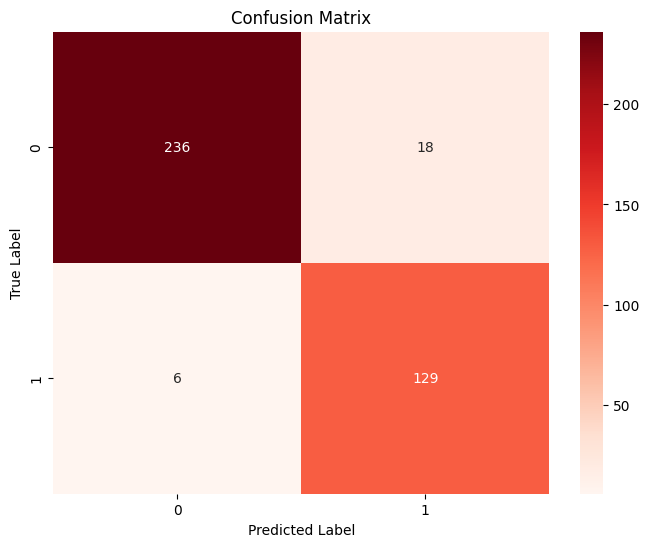

Accuracy: 0.9383033419023136
F1 Score (Class 1): 0.9148936170212767
Recall (Macro): 0.9423447069116361
Precision (Macro): 0.9263788159892056


In [16]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-2590')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_7 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_7 = pd.concat([df_dev, df_predictions_7], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_7['label']                                                                                               # HERE
predicted_labels = df_merged_7['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_7.to_csv('bartL_task5_predictions_001_epoch_7.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

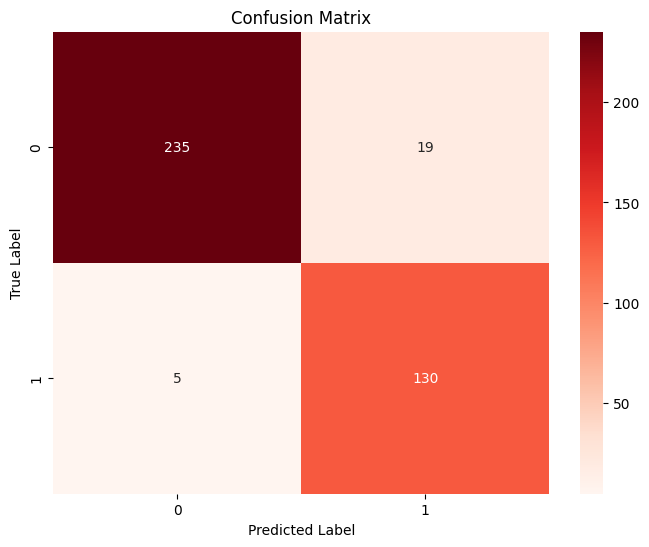

Accuracy: 0.9383033419023136
F1 Score (Class 1): 0.9154929577464789
Recall (Macro): 0.9440799066783319
Precision (Macro): 0.9258249440715883


In [17]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-2960')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_8 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_8 = pd.concat([df_dev, df_predictions_8], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_8['label']                                                                                               # HERE
predicted_labels = df_merged_8['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_8.to_csv('bartL_task5_predictions_001_epoch_8.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

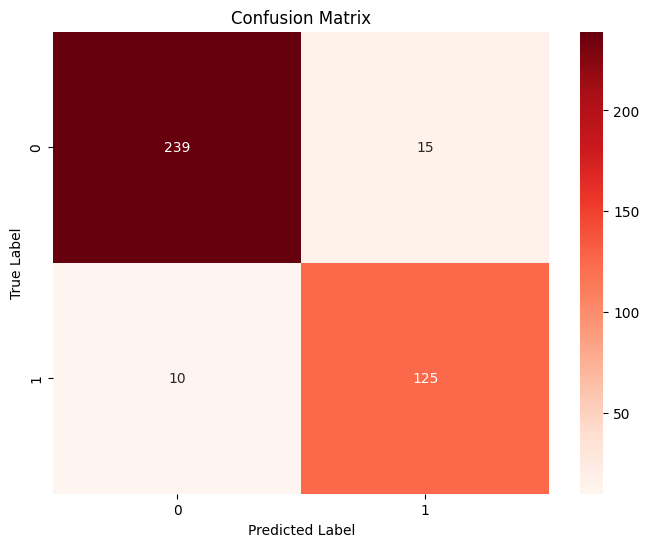

Accuracy: 0.9357326478149101
F1 Score (Class 1): 0.9090909090909091
Recall (Macro): 0.9334354039078449
Precision (Macro): 0.9263482501434308


In [18]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-3330')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_9 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_9 = pd.concat([df_dev, df_predictions_9], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_9['label']                                                                                               # HERE
predicted_labels = df_merged_9['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_9.to_csv('bartL_task5_predictions_001_epoch_9.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

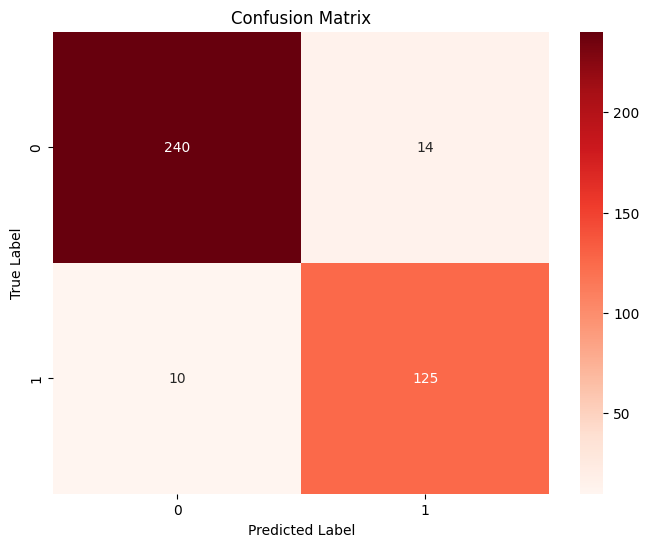

Accuracy: 0.9383033419023136
F1 Score (Class 1): 0.9124087591240877
Recall (Macro): 0.9354039078448527
Precision (Macro): 0.9296402877697841


In [19]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-3700')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_10 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_10 = pd.concat([df_dev, df_predictions_10], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_10['label']                                                                                               # HERE
predicted_labels = df_merged_10['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_10.to_csv('bartL_task5_predictions_001_epoch_10.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

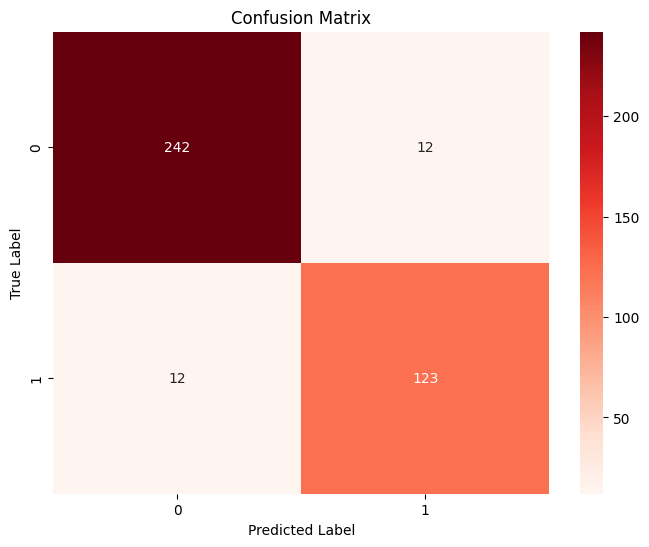

Accuracy: 0.9383033419023136
F1 Score (Class 1): 0.9111111111111111
Recall (Macro): 0.931933508311461
Precision (Macro): 0.931933508311461


In [20]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-4070')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_11 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_11 = pd.concat([df_dev, df_predictions_11], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_11['label']                                                                                               # HERE
predicted_labels = df_merged_11['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_11.to_csv('bartL_task5_predictions_001_epoch_11.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

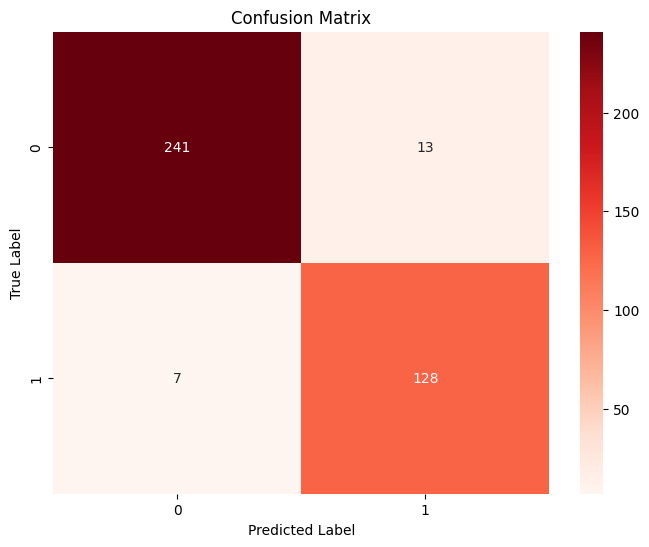

Accuracy: 0.9485861182519281
F1 Score (Class 1): 0.927536231884058
Recall (Macro): 0.9484835228929718
Precision (Macro): 0.9397878059940517


In [21]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-4440')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_12 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_12 = pd.concat([df_dev, df_predictions_12], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_12['label']                                                                                               # HERE
predicted_labels = df_merged_12['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_12.to_csv('bartL_task5_predictions_001_epoch_12.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

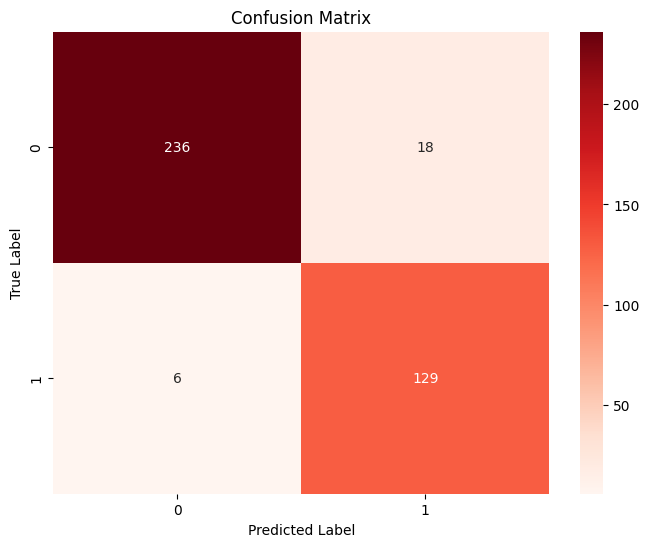

Accuracy: 0.9383033419023136
F1 Score (Class 1): 0.9148936170212767
Recall (Macro): 0.9423447069116361
Precision (Macro): 0.9263788159892056


In [22]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-4810')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_13 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_13 = pd.concat([df_dev, df_predictions_13], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_13['label']                                                                                               # HERE
predicted_labels = df_merged_13['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_13.to_csv('bartL_task5_predictions_001_epoch_13.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

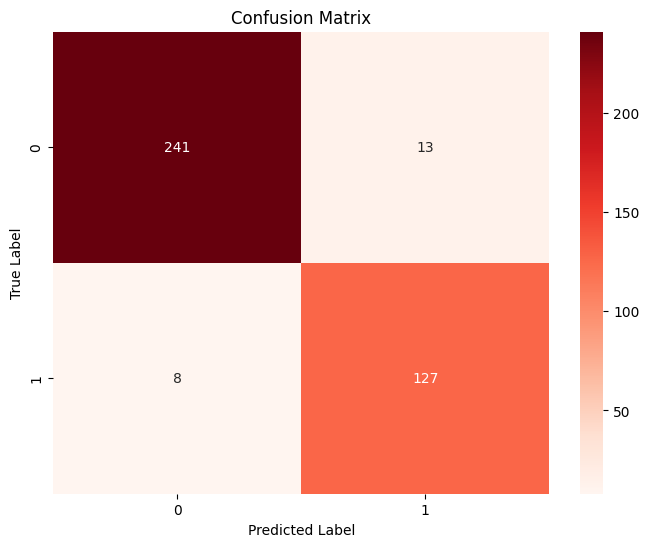

Accuracy: 0.9460154241645244
F1 Score (Class 1): 0.9236363636363636
Recall (Macro): 0.944779819189268
Precision (Macro): 0.9375071715433161


In [23]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-5180')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_14 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_14 = pd.concat([df_dev, df_predictions_14], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_14['label']                                                                                               # HERE
predicted_labels = df_merged_14['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_14.to_csv('bartL_task5_predictions_001_epoch_14.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

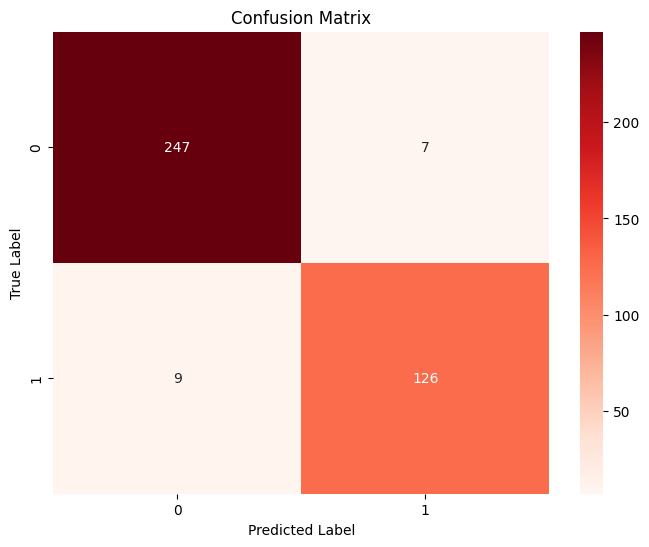

Accuracy: 0.9588688946015425
F1 Score (Class 1): 0.9402985074626865
Recall (Macro): 0.9528871391076116
Precision (Macro): 0.9561060855263157


In [24]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-5550')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_15 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_15 = pd.concat([df_dev, df_predictions_15], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_15['label']                                                                                               # HERE
predicted_labels = df_merged_15['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_15.to_csv('bartL_task5_predictions_001_epoch_15.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

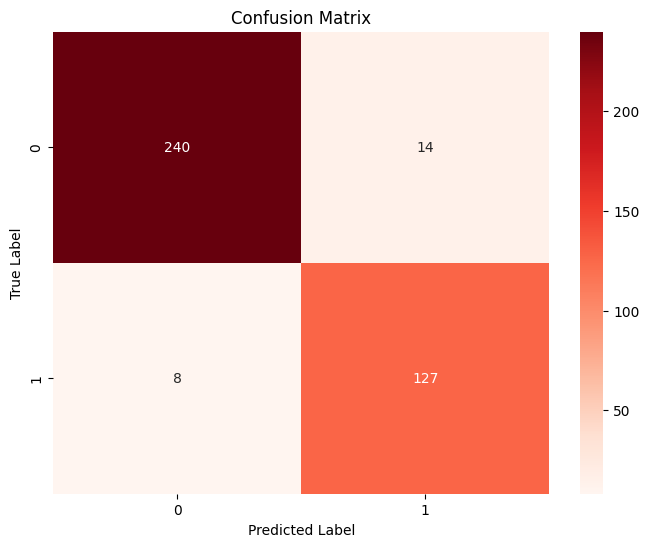

Accuracy: 0.9434447300771208
F1 Score (Class 1): 0.9202898550724639
Recall (Macro): 0.9428113152522601
Precision (Macro): 0.9342255776710136


In [25]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-5920')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_16 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_16 = pd.concat([df_dev, df_predictions_16], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_16['label']                                                                                               # HERE
predicted_labels = df_merged_16['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_16.to_csv('bartL_task5_predictions_001_epoch_16.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

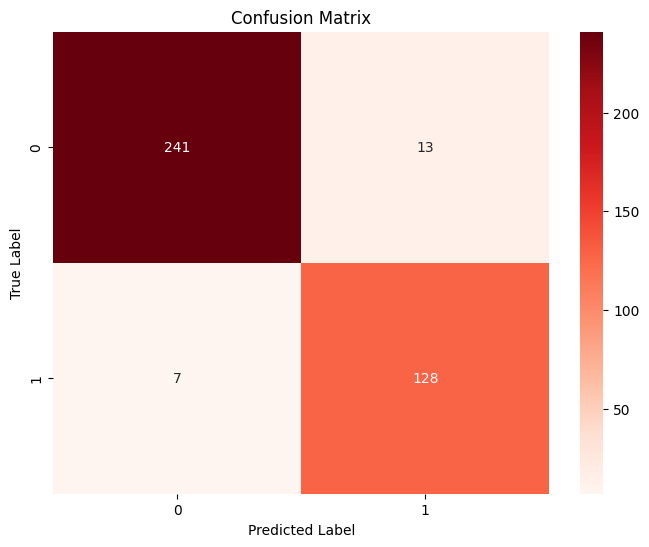

Accuracy: 0.9485861182519281
F1 Score (Class 1): 0.927536231884058
Recall (Macro): 0.9484835228929718
Precision (Macro): 0.9397878059940517


In [26]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-6290')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_17 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_17 = pd.concat([df_dev, df_predictions_17], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_17['label']                                                                                               # HERE
predicted_labels = df_merged_17['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_17.to_csv('bartL_task5_predictions_001_epoch_17.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

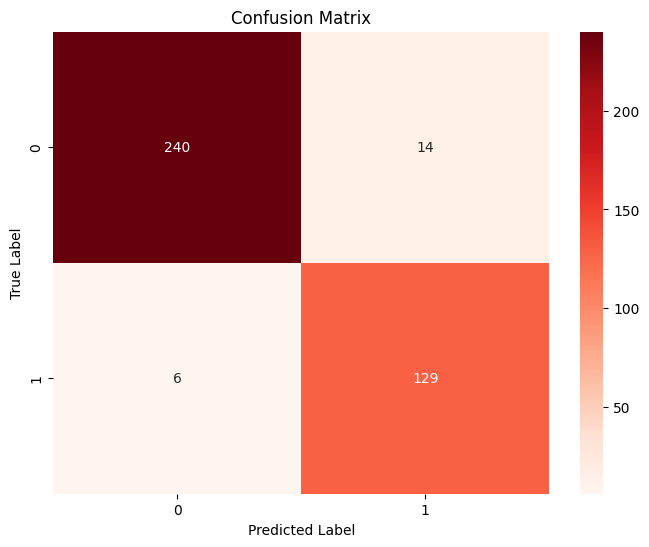

Accuracy: 0.9485861182519281
F1 Score (Class 1): 0.9280575539568345
Recall (Macro): 0.9502187226596676
Precision (Macro): 0.9388538290977315


In [27]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-6660')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_18 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_18 = pd.concat([df_dev, df_predictions_18], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_18['label']                                                                                               # HERE
predicted_labels = df_merged_18['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_18.to_csv('bartL_task5_predictions_001_epoch_18.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

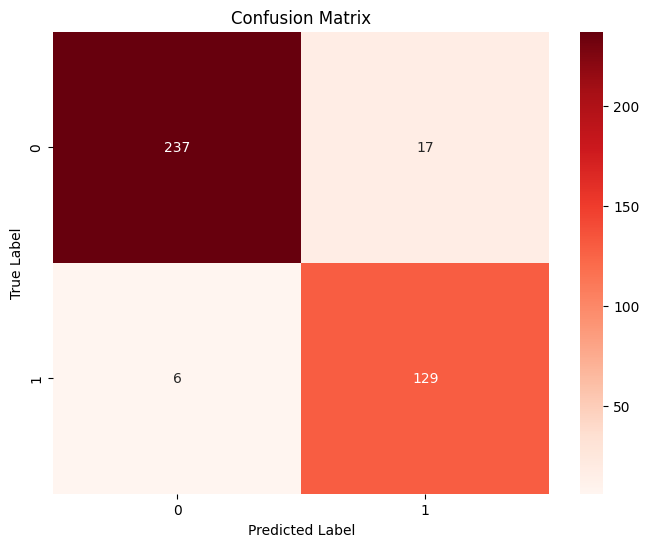

Accuracy: 0.9408740359897172
F1 Score (Class 1): 0.9181494661921709
Recall (Macro): 0.944313210848644
Precision (Macro): 0.9294351429054626


In [28]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-7030')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_19 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_19 = pd.concat([df_dev, df_predictions_19], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_19['label']                                                                                               # HERE
predicted_labels = df_merged_19['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_19.to_csv('bartL_task5_predictions_001_epoch_19.csv', index=False)                                                          # HERE  # HERE

Evaluating:   0%|          | 0/11 [00:00<?, ?it/s]

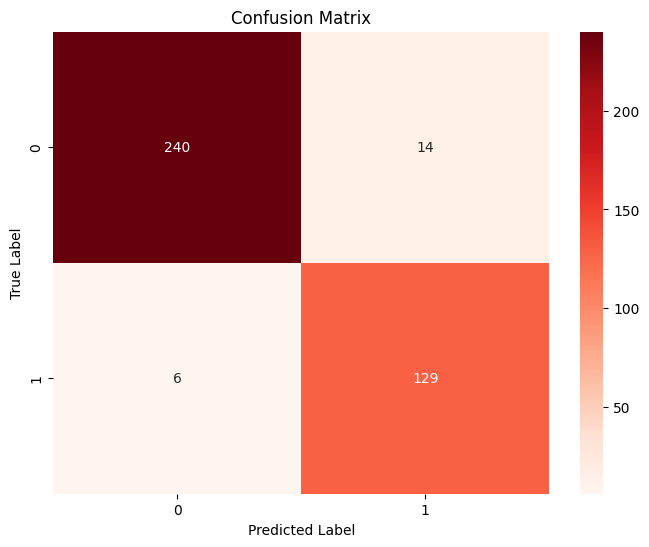

Accuracy: 0.9485861182519281
F1 Score (Class 1): 0.9280575539568345
Recall (Macro): 0.9502187226596676
Precision (Macro): 0.9388538290977315


In [29]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/results_temp/checkpoint-7400')                              # HERE
model = model.to('cuda')
dev_texts = df_dev['text'].tolist()
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=36, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy()))
df_predictions_20 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight'])          # HERE
df_merged_20 = pd.concat([df_dev, df_predictions_20], axis=1)                                                                      # HERE  # HERE
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
true_labels = df_merged_20['label']                                                                                               # HERE
predicted_labels = df_merged_20['predicted_label']                                                                                # HERE
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, pos_label=1)
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")
df_merged_20.to_csv('bartL_task5_predictions_001_epoch_20.csv', index=False)                                                          # HERE  # HERE

In [31]:
df_gpt = pd.read_csv('/content/GPT4_Task5_001_Dev_preds.csv')
df_gpt

,tweet_id,text,label,pred
0,1265323726570225669,Mom Finds Secret to Homeschooling her Autistic...,0,0
1,1254180961622900738,I hope our child has my calmness and NOT Andre...,0,1
2,800336385399885824,Blind Girl With Autism Mimics Whitney Houston ...,0,0
3,1107948318150152192,"@amyschumer watching #growing, my 2yo son has ...",1,1
4,1438320313511473154,@robbystarbuck @AmericanAir would rather a mot...,0,0
...,...,...,...,...
384,1479160193808273413,my 7yo is being tested for adhd and struggles ...,0,1
385,1084086161667252225,@attachedmrsL the first reply on the tweet tho...,0,0
386,1404612356819374080,There's a mom who recorded her autistic son &a...,0,0
387,1458807608052174856,@itsadollthxng Lmfao girl !!! I’m upset fr cau...,1,1


In [42]:
df_merged_15

,tweet_id,text,label,predicted_label,prediction_0_weight,prediction_1_weight
0,1265323726570225669,Mom Finds Secret to Homeschooling her Autistic...,0,0,0.999998,9.558092e-07
1,1254180961622900738,I hope our child has my calmness and NOT Andre...,0,0,0.999997,1.946039e-06
2,800336385399885824,Blind Girl With Autism Mimics Whitney Houston ...,0,0,0.999998,6.644311e-07
3,1107948318150152192,"watching my 2yo son has ASD, you just made me...",1,1,0.000003,9.999963e-01
4,1438320313511473154,would rather a mother suffocate an asthmatic ...,0,0,0.999998,1.358405e-06
...,...,...,...,...,...,...
384,1479160193808273413,my 7yo is being tested for adhd and struggles ...,0,0,0.999982,1.655127e-05
385,1084086161667252225,"the first reply on the tweet though 🤣 yes, I ...",0,0,0.999998,1.252801e-06
386,1404612356819374080,There's a mom who recorded her autistic son &a...,0,0,0.999999,5.767376e-07
387,1458807608052174856,Lmfao girl !!! I’m upset fr cause jacelyn has...,1,1,0.000013,9.999859e-01


In [43]:
df_gpt4_15 = df_merged_15.join(df_gpt.iloc[:, -1].rename('pred_gpt4'))
df_gpt4_15

,tweet_id,text,label,predicted_label,prediction_0_weight,prediction_1_weight,pred_gpt4
0,1265323726570225669,Mom Finds Secret to Homeschooling her Autistic...,0,0,0.999998,9.558092e-07,0
1,1254180961622900738,I hope our child has my calmness and NOT Andre...,0,0,0.999997,1.946039e-06,1
2,800336385399885824,Blind Girl With Autism Mimics Whitney Houston ...,0,0,0.999998,6.644311e-07,0
3,1107948318150152192,"watching my 2yo son has ASD, you just made me...",1,1,0.000003,9.999963e-01,1
4,1438320313511473154,would rather a mother suffocate an asthmatic ...,0,0,0.999998,1.358405e-06,0
...,...,...,...,...,...,...,...
384,1479160193808273413,my 7yo is being tested for adhd and struggles ...,0,0,0.999982,1.655127e-05,1
385,1084086161667252225,"the first reply on the tweet though 🤣 yes, I ...",0,0,0.999998,1.252801e-06,0
386,1404612356819374080,There's a mom who recorded her autistic son &a...,0,0,0.999999,5.767376e-07,0
387,1458807608052174856,Lmfao girl !!! I’m upset fr cause jacelyn has...,1,1,0.000013,9.999859e-01,1


In [44]:
df_view = df_gpt4_15[['tweet_id', 'label', 'predicted_label', 'pred_gpt4']]
df_view

,tweet_id,label,predicted_label,pred_gpt4
0,1265323726570225669,0,0,0
1,1254180961622900738,0,0,1
2,800336385399885824,0,0,0
3,1107948318150152192,1,1,1
4,1438320313511473154,0,0,0
...,...,...,...,...
384,1479160193808273413,0,0,1
385,1084086161667252225,0,0,0
386,1404612356819374080,0,0,0
387,1458807608052174856,1,1,1


In [45]:
df_view_0 = df_view[df_view['pred_gpt4'] == 0]
df_view_1 = df_view[df_view['pred_gpt4'] == 1]

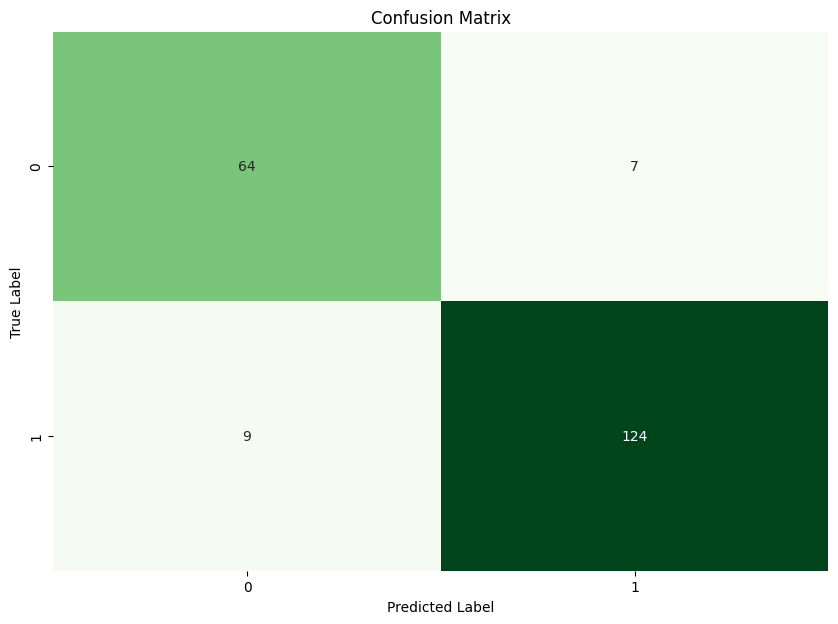

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(df_view_1['label'], df_view_1['predicted_label'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

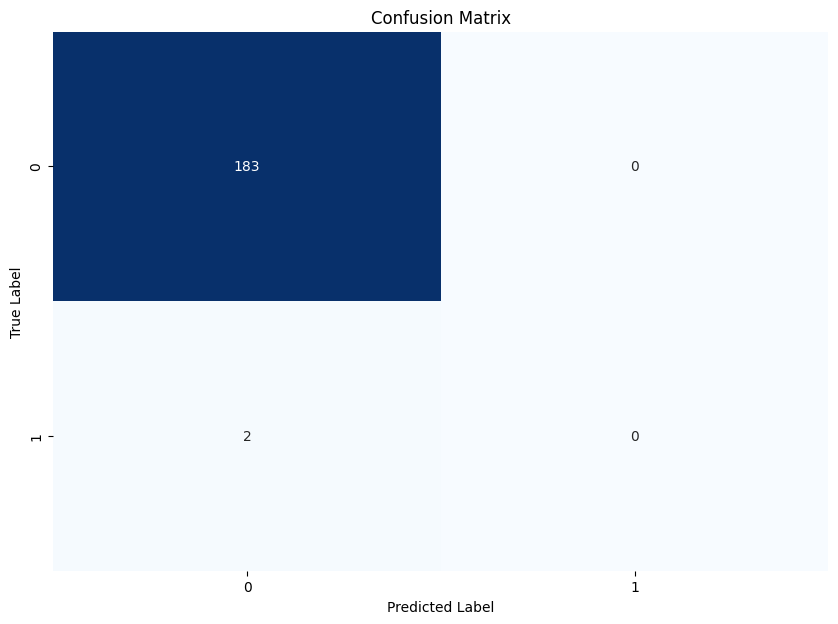

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(df_view_0['label'], df_view_0['pred_gpt4'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [48]:
import numpy as np
df_view['final_pred'] = np.where(df_view['pred_gpt4'] == 0, 0, df_view['predicted_label'])
df_view

<ipython-input-48-89ff39692ef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_view['final_pred'] = np.where(df_view['pred_gpt4'] == 0, 0, df_view['predicted_label'])


,tweet_id,label,predicted_label,pred_gpt4,final_pred
0,1265323726570225669,0,0,0,0
1,1254180961622900738,0,0,1,0
2,800336385399885824,0,0,0,0
3,1107948318150152192,1,1,1,1
4,1438320313511473154,0,0,0,0
...,...,...,...,...,...
384,1479160193808273413,0,0,1,0
385,1084086161667252225,0,0,0,0
386,1404612356819374080,0,0,0,0
387,1458807608052174856,1,1,1,1


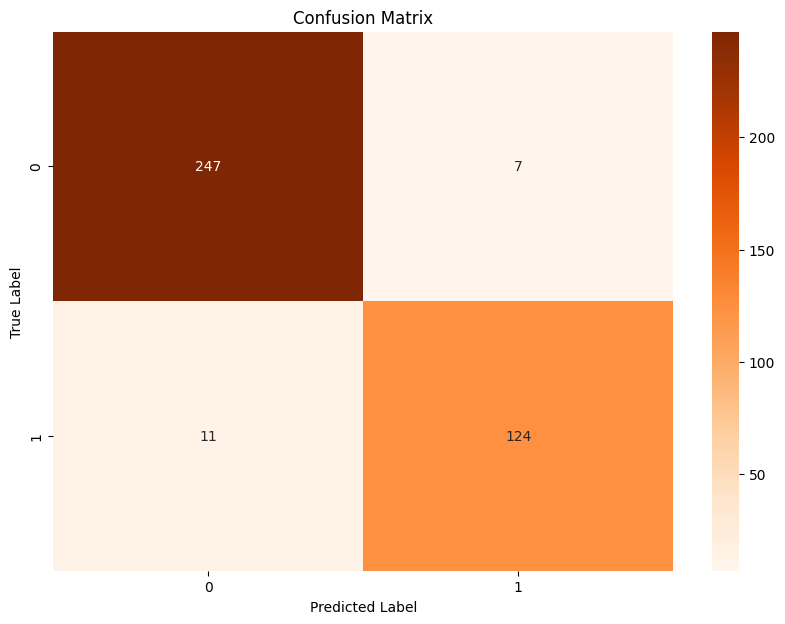

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(df_view['label'], df_view['final_pred'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
y_true = df_view['label']
y_pred = df_view['final_pred']
accuracy = accuracy_score(y_true, y_pred)
f1_class_1 = f1_score(y_true, y_pred, pos_label=1)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_macro}")
print(f"Precision (Macro): {precision_macro}")

Accuracy: 0.9537275064267352
F1 Score (Class 1): 0.9323308270676691
Recall (Macro): 0.9454797317002042
Precision (Macro): 0.9519646132907273


In [51]:
!mv -r /content/results_temp/checkpoint-5550 /content/drive/MyDrive/BART_15_SMM4H_Task5

mv: invalid option -- 'r'
Try 'mv --help' for more information.


In [52]:
!mv /content/results_temp/checkpoint-5550 /content/drive/MyDrive/BART_15_SMM4H_Task5